1996.png
456.png
2337.png
336.png
1596.png
317.png
2156.png
696.png
677.png
2277.png
237.png
2077.png
956.png
1077.png
2397.png
277.png
296.png
1357.png
2056.png
2317.png
1996.png
456.png
2337.png
336.png
1596.png
317.png
2156.png
696.png
677.png
2277.png
237.png
2077.png
956.png
1077.png
2397.png
277.png
296.png
1357.png
2056.png
2317.png


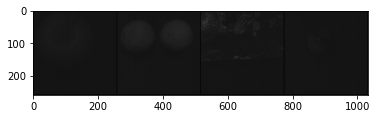

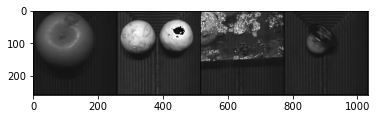

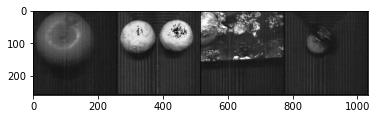

(4, 1, 256, 256)


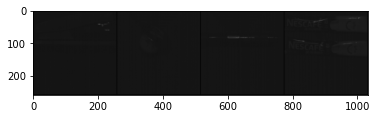

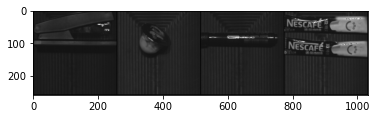

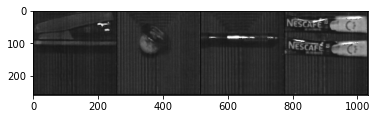

(4, 1, 256, 256)


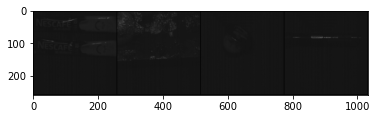

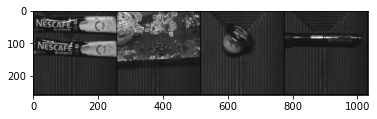

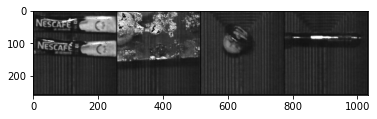

(4, 1, 256, 256)


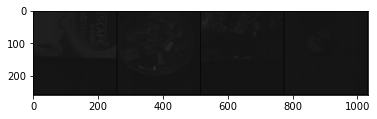

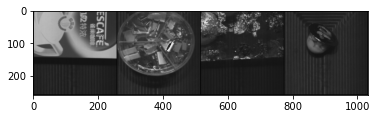

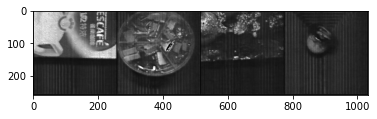

(4, 1, 256, 256)


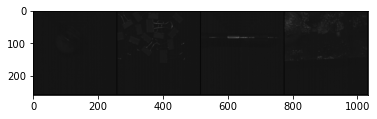

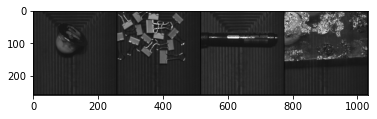

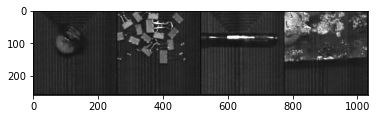

(4, 1, 256, 256)


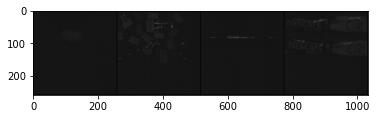

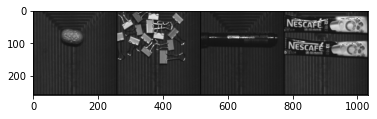

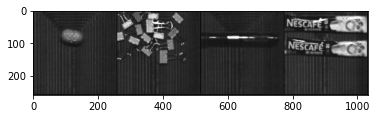

(4, 1, 256, 256)


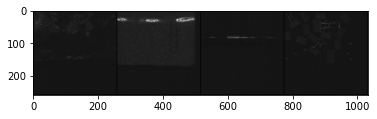

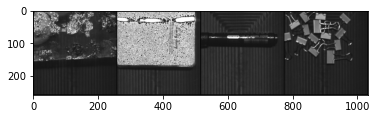

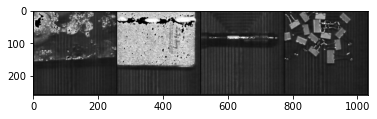

(4, 1, 256, 256)


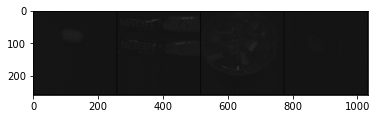

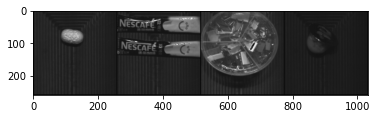

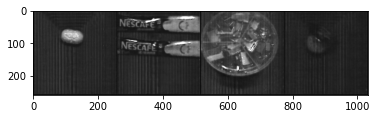

(4, 1, 256, 256)


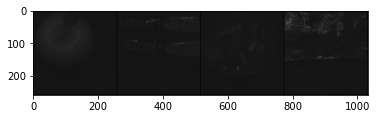

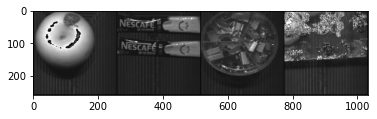

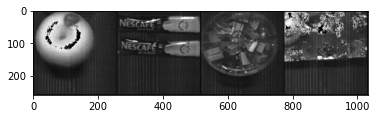

(4, 1, 256, 256)


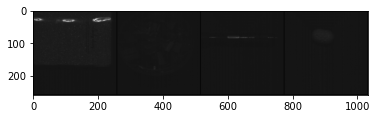

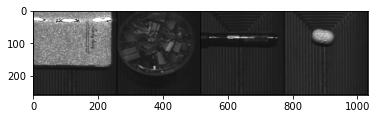

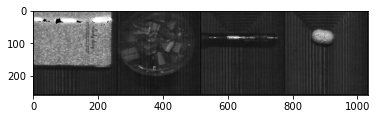

(4, 1, 256, 256)


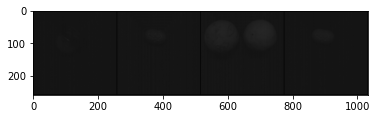

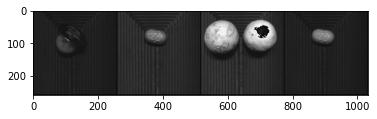

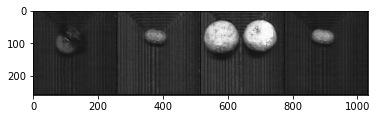

(4, 1, 256, 256)


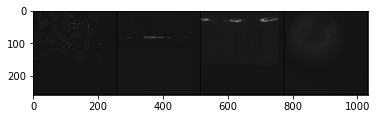

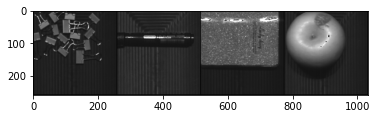

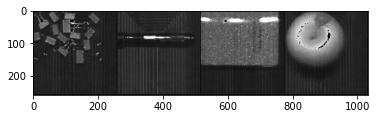

(4, 1, 256, 256)


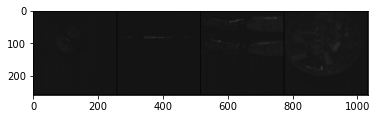

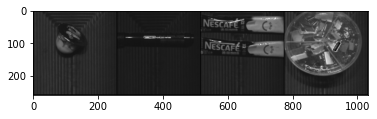

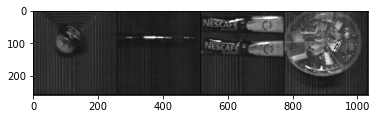

(4, 1, 256, 256)


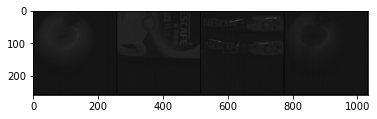

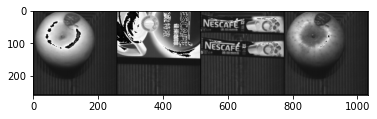

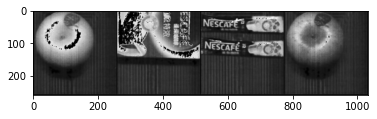

(4, 1, 256, 256)


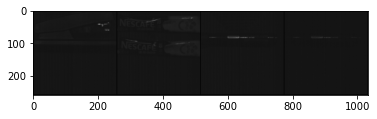

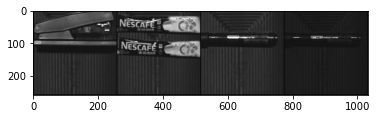

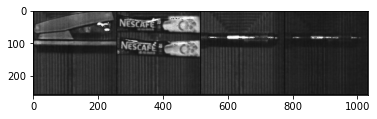

(4, 1, 256, 256)


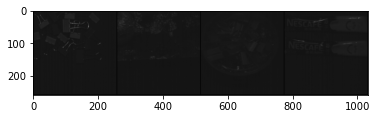

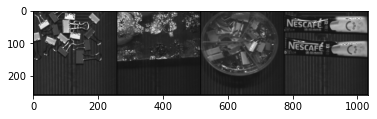

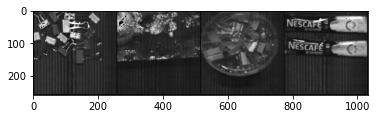

(4, 1, 256, 256)


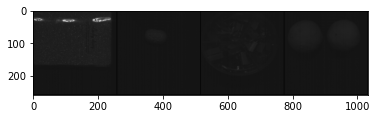

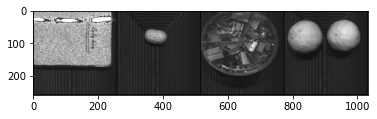

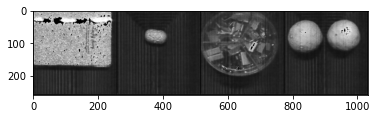

(4, 1, 256, 256)


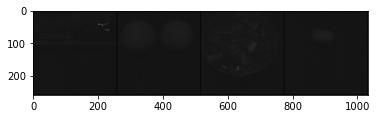

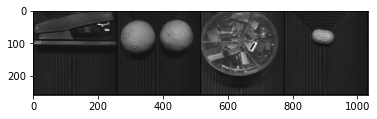

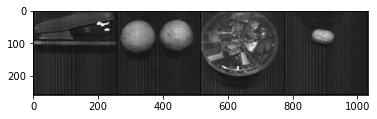

(4, 1, 256, 256)


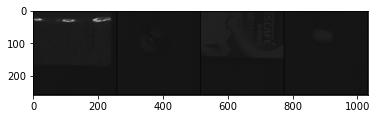

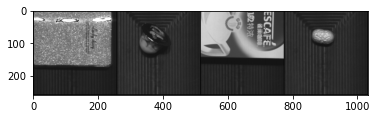

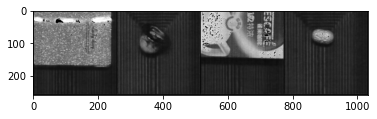

(4, 1, 256, 256)


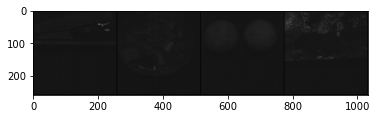

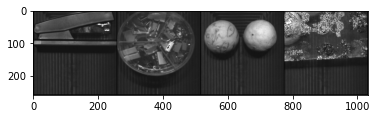

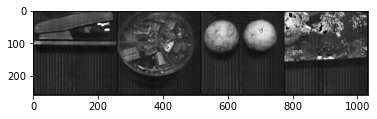

(4, 1, 256, 256)



In [2]:
import torch
from torch import nn
from tqdm.auto import tqdm
from torchvision import transforms
from torchvision.datasets import VOCSegmentation
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
torch.manual_seed(0)

import torch.nn.functional as F
import os
from data.spectral_dataset import SpectralDataSet

from models.UNetGenerator import *
from models.Discriminator import *

os.environ["CUDA_VISIBLE_DEVICES"] = "2"

n_epochs = 20
input_dim = 1
real_dim = 1
display_step = 400
batch_size = 4
lr = 0.0002
target_shape = 256
device = 'cuda'

import torch
from torch import nn
from tqdm.auto import tqdm
from torchvision import transforms
from torchvision.datasets import VOCSegmentation
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

from data.spectral_dataset import SpectralDataSet
from models.UNet import *
from utils import *
import os
import torch.nn.functional as F
from torchvision.utils import save_image
from PIL import Image
import numpy as np

def main():
    use_cuda = torch.cuda.is_available()
    device = torch.device('cuda' if use_cuda else 'cpu')

    unet_generator = UNetGenerator(input_dim, real_dim)
    loaded_state = torch.load("pix2pix_5000.pth", map_location='cpu')

    unet_generator.load_state_dict(loaded_state["gen"])

    #unet_generator.eval()

    if use_cuda:
        unet_generator.cuda()


    transform = transforms.Compose([transforms.CenterCrop(256), transforms.ToTensor(), ])
    dataset = SpectralDataSet(root_dir='/mnt/liguanlin/DataSets/lowlight_hyperspectral_datasets/band_splited_dataset_8bit', type_name='test', transform=transform)

    dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=False)

    count = 0

    for condition, real in tqdm(dataloader):
        cur_batch_size = len(condition)
        condition = condition.to(device)
        real = real.to(device)

        pred = unet_generator(condition)

         ### Visualization code ###
        show_tensor_images(condition, size=(input_dim, target_shape, target_shape))
        show_tensor_images(real, size=(real_dim, target_shape, target_shape))
        show_tensor_images(pred, size=(real_dim, target_shape, target_shape))
                
        #print(pred.shape)
        #print(condition.shape)
        save_image(pred, 'pred.png', nrow=2)
        save_image(real, 'labels.png', nrow=2)

        pred_numpy = pred.detach().cpu().numpy()
        label_numpy = real.detach().cpu().numpy()
        origin_numpy = condition.detach().cpu().numpy()

        print(pred_numpy.shape)
        """
        for i in range(pred_numpy.shape[0]):
            pred_numpy_img = pred_numpy[i].reshape((pred_numpy.shape[2], pred_numpy.shape[3]))
            pred_numpy_img = pred_numpy_img * 255
            pred_numpy_img = pred_numpy_img.astype(np.uint8)
            image = Image.fromarray(pred_numpy_img)
            iamge_name = "./test_results_pix2pix/pred/" + str(count*4 + i) + ".png"
            image.save(iamge_name)

            label_numpy_img = label_numpy[i].reshape((label_numpy.shape[2], label_numpy.shape[3]))
            label_numpy_img = label_numpy_img * 255
            label_numpy_img = label_numpy_img.astype(np.uint8)
            label_image = Image.fromarray(label_numpy_img)
            label_iamge_name = "./test_results_pix2pix/label/" + str(count*4 + i) + ".png"
            label_image.save(label_iamge_name)

            origin_numpy_img = origin_numpy[i].reshape((origin_numpy.shape[2], origin_numpy.shape[3]))
            origin_numpy_img = origin_numpy_img * 255
            origin_numpy_img = origin_numpy_img.astype(np.uint8)
            origin_image = Image.fromarray(origin_numpy_img)
            origin_iamge_name = "./test_results_pix2pix/original/" + str(count*4 + i) + ".png"
            origin_image.save(origin_iamge_name)
        """
        count += 1

        if(count == 20):
            break
        

if __name__=="__main__":
    main()

  

1996.png
456.png
2337.png
336.png
1596.png
317.png
2156.png
696.png
677.png
2277.png
237.png
2077.png
956.png
1077.png
2397.png
277.png
296.png
1357.png
2056.png
2317.png
1996.png
456.png
2337.png
336.png
1596.png
317.png
2156.png
696.png
677.png
2277.png
237.png
2077.png
956.png
1077.png
2397.png
277.png
296.png
1357.png
2056.png
2317.png


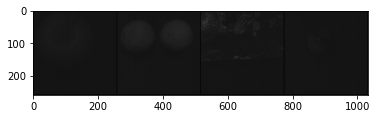

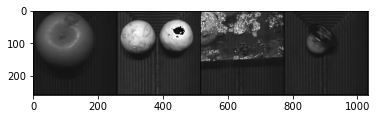

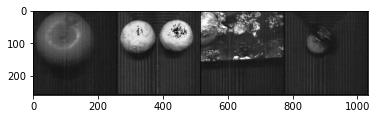

(4, 1, 256, 256)


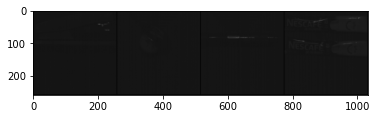

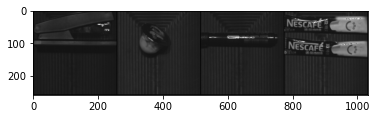

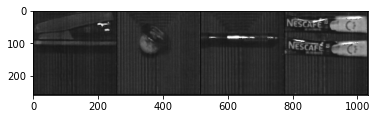

(4, 1, 256, 256)


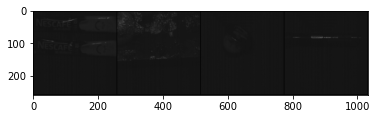

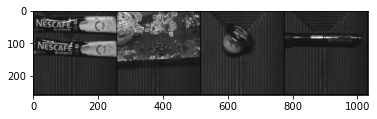

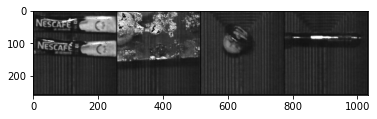

(4, 1, 256, 256)


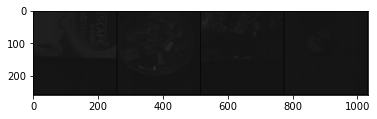

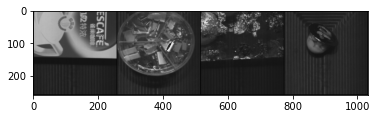

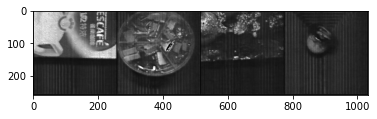

(4, 1, 256, 256)


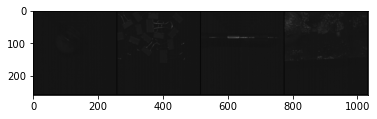

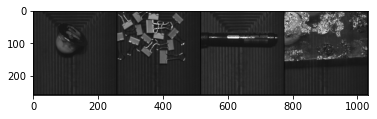

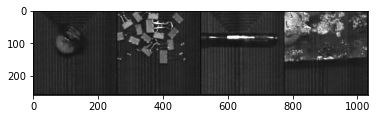

(4, 1, 256, 256)


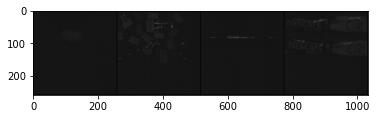

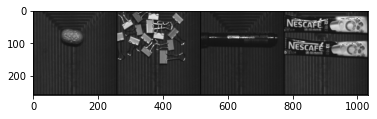

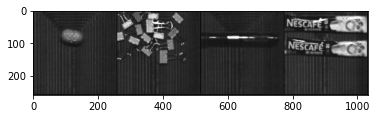

(4, 1, 256, 256)


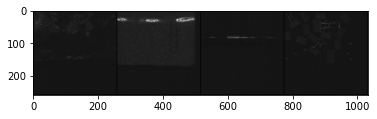

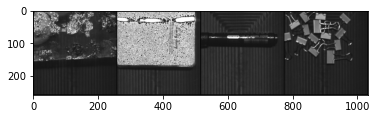

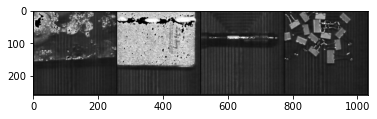

(4, 1, 256, 256)


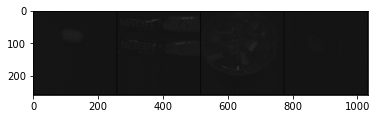

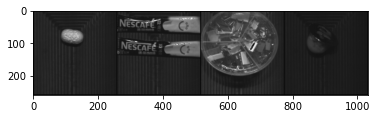

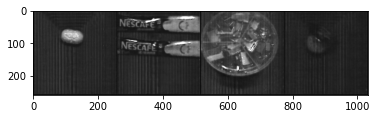

(4, 1, 256, 256)


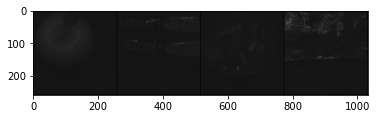

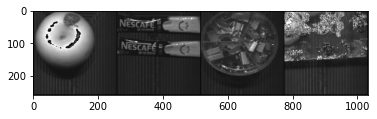

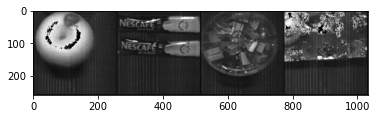

(4, 1, 256, 256)


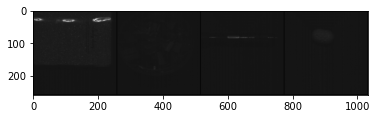

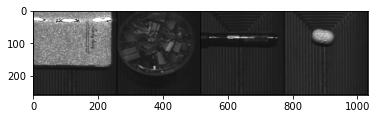

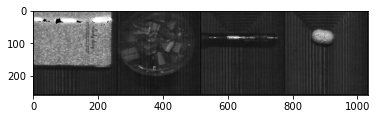

(4, 1, 256, 256)


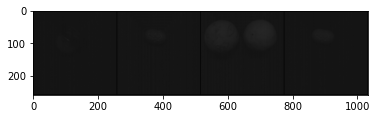

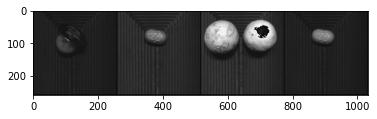

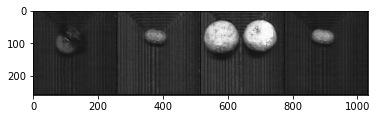

(4, 1, 256, 256)


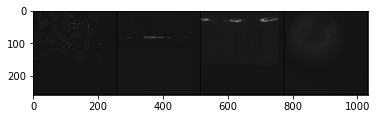

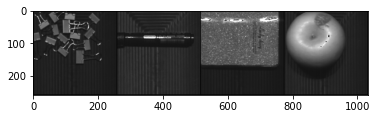

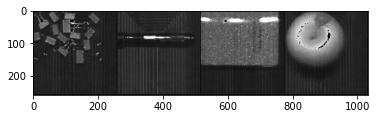

(4, 1, 256, 256)


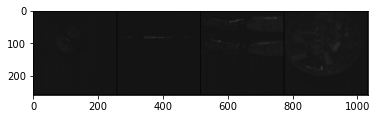

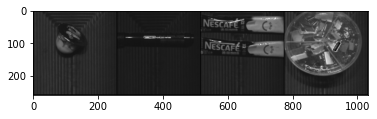

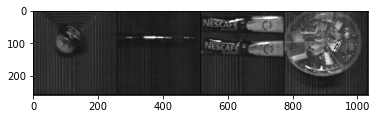

(4, 1, 256, 256)


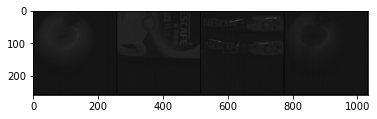

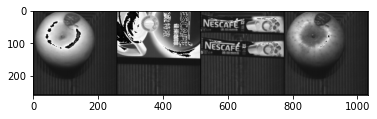

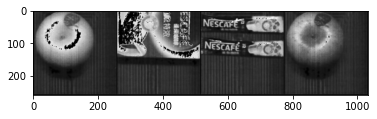

(4, 1, 256, 256)


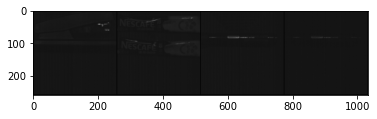

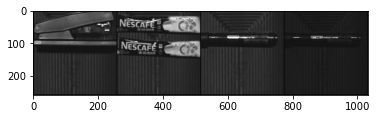

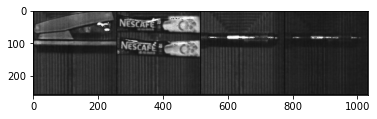

(4, 1, 256, 256)


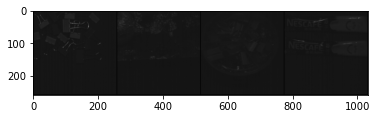

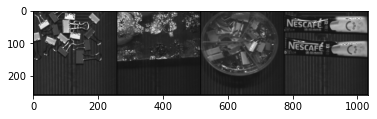

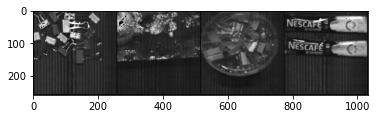

(4, 1, 256, 256)


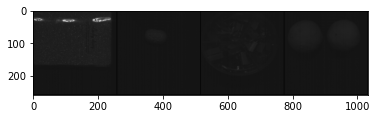

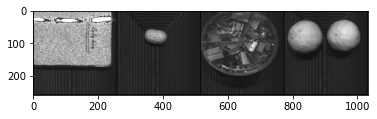

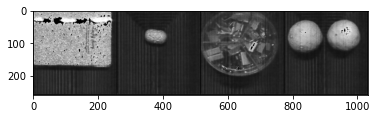

(4, 1, 256, 256)


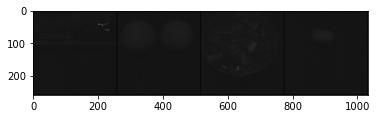

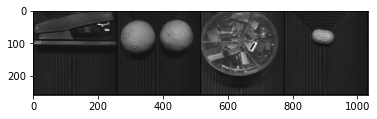

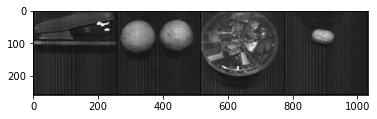

(4, 1, 256, 256)


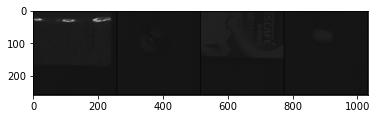

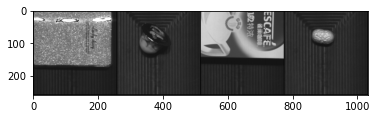

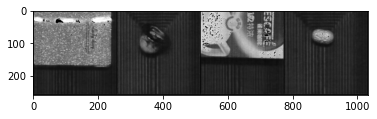

(4, 1, 256, 256)


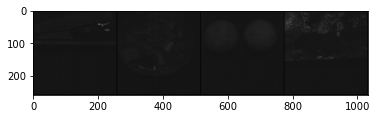

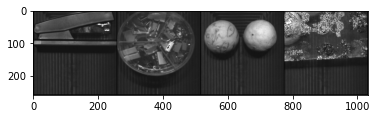

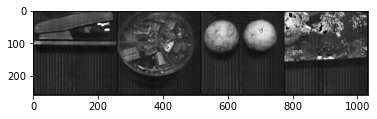

(4, 1, 256, 256)



In [4]:
import torch
from torch import nn
from tqdm.auto import tqdm
from torchvision import transforms
from torchvision.datasets import VOCSegmentation
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
torch.manual_seed(0)

import torch.nn.functional as F
import os
from data.spectral_dataset import SpectralDataSet

from models.UNetGenerator import *
from models.Discriminator import *

os.environ["CUDA_VISIBLE_DEVICES"] = "2"

n_epochs = 20
input_dim = 1
real_dim = 1
display_step = 400
batch_size = 4
lr = 0.0002
target_shape = 256
device = 'cuda'

import torch
from torch import nn
from tqdm.auto import tqdm
from torchvision import transforms
from torchvision.datasets import VOCSegmentation
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

from data.spectral_dataset import SpectralDataSet
from models.UNet import *
from utils import *
import os
import torch.nn.functional as F
from torchvision.utils import save_image
from PIL import Image
import numpy as np

def main():
    use_cuda = torch.cuda.is_available()
    device = torch.device('cuda' if use_cuda else 'cpu')

    unet_generator = UNetGenerator(input_dim, real_dim)
    loaded_state = torch.load("pix2pix_5000.pth")

    unet_generator.load_state_dict(loaded_state["gen"])

    #unet_generator.eval()

    if use_cuda:
        unet_generator.cuda()


    transform = transforms.Compose([transforms.CenterCrop(256), transforms.ToTensor(), ])
    dataset = SpectralDataSet(root_dir='/mnt/liguanlin/DataSets/lowlight_hyperspectral_datasets/band_splited_dataset_8bit', type_name='test', transform=transform)

    dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=False)

    count = 0

    for condition, real in tqdm(dataloader):
        cur_batch_size = len(condition)
        condition = condition.to(device)
        real = real.to(device)

        pred = unet_generator(condition)

         ### Visualization code ###
        show_tensor_images(condition, size=(input_dim, target_shape, target_shape))
        show_tensor_images(real, size=(real_dim, target_shape, target_shape))
        show_tensor_images(pred, size=(real_dim, target_shape, target_shape))
                
        #print(pred.shape)
        #print(condition.shape)
        save_image(pred, 'pred.png', nrow=2)
        save_image(real, 'labels.png', nrow=2)

        pred_numpy = pred.detach().cpu().numpy()
        label_numpy = real.detach().cpu().numpy()
        origin_numpy = condition.detach().cpu().numpy()

        print(pred_numpy.shape)
        """
        for i in range(pred_numpy.shape[0]):
            pred_numpy_img = pred_numpy[i].reshape((pred_numpy.shape[2], pred_numpy.shape[3]))
            pred_numpy_img = pred_numpy_img * 255
            pred_numpy_img = pred_numpy_img.astype(np.uint8)
            image = Image.fromarray(pred_numpy_img)
            iamge_name = "./test_results_pix2pix/pred/" + str(count*4 + i) + ".png"
            image.save(iamge_name)

            label_numpy_img = label_numpy[i].reshape((label_numpy.shape[2], label_numpy.shape[3]))
            label_numpy_img = label_numpy_img * 255
            label_numpy_img = label_numpy_img.astype(np.uint8)
            label_image = Image.fromarray(label_numpy_img)
            label_iamge_name = "./test_results_pix2pix/label/" + str(count*4 + i) + ".png"
            label_image.save(label_iamge_name)

            origin_numpy_img = origin_numpy[i].reshape((origin_numpy.shape[2], origin_numpy.shape[3]))
            origin_numpy_img = origin_numpy_img * 255
            origin_numpy_img = origin_numpy_img.astype(np.uint8)
            origin_image = Image.fromarray(origin_numpy_img)
            origin_iamge_name = "./test_results_pix2pix/original/" + str(count*4 + i) + ".png"
            origin_image.save(origin_iamge_name)
        """
        count += 1

        if(count == 20):
            break
        

if __name__=="__main__":
    main()
